In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [7]:
import warnings
warnings.filterwarnings("ignore")
#df.unique().sort_values()

## Read and load data

##### Loading the Application data  from csv

In [8]:
Application_Data = pd.read_csv("application_data.csv", encoding="unicode_escape")

#### Inspecting Application_Data dataframe (shape, info, describe etc.) 

In [9]:
Application_Data.shape

(307511, 122)

In [10]:
Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [11]:
Application_Data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [12]:
Application_Data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Column wise null percentages

#### Inspecting the Application_Data dataframe. Calculating the null percentages in each column

In [13]:
#Calculating the column wise null percentages and roundinng off to 2 decimal places
Application_Data_Null = round(100*Application_Data.isnull().sum(axis = 0) / len(Application_Data.index), 2)

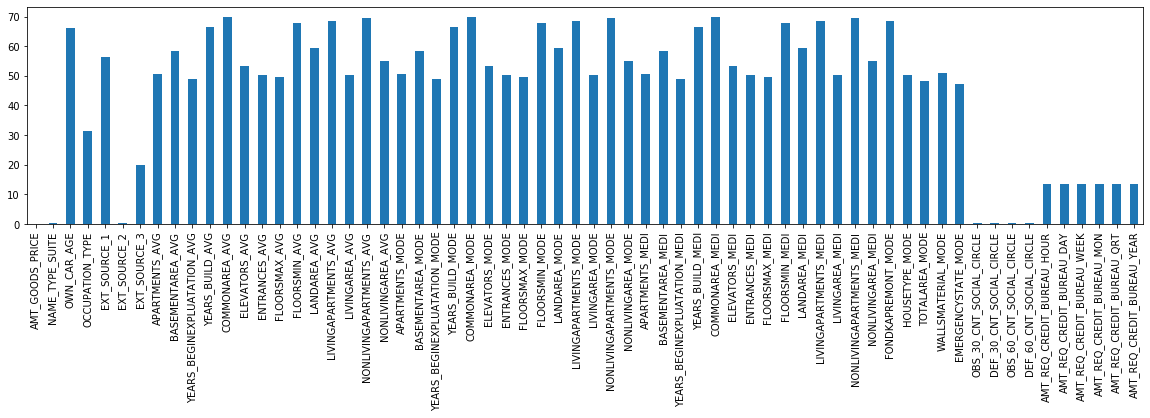

In [14]:
Application_Data_Null.iloc[Application_Data_Null.nonzero()].sort_values(ascending=False, inplace=True)
plt.figure(figsize=(20,4))
Application_Data_Null[Application_Data_Null>0].plot.bar()

### Handling column wise Null values 
#### Clearly, this dataframe has a high null percentages for a number of columns. Removing all the columns having null percentage greater than 50.

In [15]:
#Get the list of columns that need to be dropped (Null percent > 50)
Cols_To_Drop = list(Application_Data_Null[Application_Data_Null.values>=50].index)
Application_Data.drop(labels=Cols_To_Drop, inplace=True , axis=1)
len(Cols_To_Drop)

41

In [16]:
#Verify if the required columns have been dropped
Application_Data.shape

(307511, 81)

    As observed, 81 columns remain. Hence, 122 - 81 = 41 columns have been dropped

### Imputing values in columns

#### For columns with small null percentages, say less than 15%, we will impute some value

In [17]:
#TBD

## Subset Dataframe 
#### Subsetting the Application_Data dataframe to get relevant 30 columns as per ourunderstanding for further analysis.

    Selected the following columns:
    1. SK_ID_CURR
    2. TARGET
    3. NAME_CONTRACT_TYPE
    4. CODE_GENDER
    5. FLAG_OWN_REALTY
    6. CNT_CHILDREN
    7. AMT_INCOME_TOTAL
    8. AMT_CREDIT
    9. AMT_ANNUITY
    10. NAME_INCOME_TYPE
    11. NAME_EDUCATION_TYPE
    12. NAME_FAMILY_STATUS
    13. REGION_POPULATION_RELATIVE
    14. DAYS_BIRTH
    15. DAYS_EMPLOYED
    16. FLAG_MOBIL
    17. FLAG_CONT_MOBILE
    18. OCCUPATION_TYPE
    19. CNT_FAM_MEMBERS
    20. REGION_RATING_CLIENT_W_CITY
    21. WEEKDAY_APPR_PROCESS_START
    22. REG_REGION_NOT_LIVE_REGION
    23. ORGANIZATION_TYPE
    24. EXT_SOURCE_2
    25. DEF_30_CNT_SOCIAL_CIRCLE
    26. DAYS_LAST_PHONE_CHANGE
    27. FLAG_DOCUMENT_2
    28. FLAG_DOCUMENT_3
    29. AMT_REQ_CREDIT_BUREAU_HOUR
    30. AMT_REQ_CREDIT_BUREAU_WEEK

In [18]:
#Subsetting the Application_Data dataframe toget the required columns
Required_Columns = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
                   'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE',
                   'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                   'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
                   'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
                   'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
                   'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK']

Revised_Application_Data = Application_Data[Required_Columns]

In [19]:
#Verfiy Revised dataframe after subsetting
Revised_Application_Data.shape

(307511, 30)

#### Checking the data types of selected columns in Revised_Application_Data

In [20]:
Revised_Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH                     307511 non-null int64
DAYS_EMPLOYED                  307511 non-null int64
FLAG_MOBIL                     307511 non-null int64
FLAG_CONT_MOBILE           

<font color="blue">As observed, following columns have incorrect data types:</font>
    1. CNT_FAM_MEMBERS (Float) should be int64
    2. DEF_30_CNT_SOCIAL_CIRCLE (Float) should be int64
    3. DAYS_LAST_PHONE_CHANGE (Float) should be int64
    4. AMT_REQ_CREDIT_BUREAU_HOUR (Float) should be int64
    5. AMT_REQ_CREDIT_BUREAU_WEEK (Float) should be int64

### Fixing to correct data type of columns

In [21]:
#Fixing the data type for CNT_FAM_MEMBERS, DEF_30_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE,
#AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_WEEK
Revised_Application_Data.CNT_FAM_MEMBERS = Revised_Application_Data.CNT_FAM_MEMBERS.astype('Int64')
Revised_Application_Data.DEF_30_CNT_SOCIAL_CIRCLE = Revised_Application_Data.DEF_30_CNT_SOCIAL_CIRCLE.astype('Int64')
Revised_Application_Data.DAYS_LAST_PHONE_CHANGE = Revised_Application_Data.DAYS_LAST_PHONE_CHANGE.astype('Int64')
Revised_Application_Data.AMT_REQ_CREDIT_BUREAU_HOUR = Revised_Application_Data.AMT_REQ_CREDIT_BUREAU_HOUR.astype('Int64')
Revised_Application_Data.AMT_REQ_CREDIT_BUREAU_WEEK = Revised_Application_Data.AMT_REQ_CREDIT_BUREAU_WEEK.astype('Int64')

In [22]:
#Verify the changes in our Revised_Application_Data
Revised_Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH                     307511 non-null int64
DAYS_EMPLOYED                  307511 non-null int64
FLAG_MOBIL                     307511 non-null int64
FLAG_CONT_MOBILE           

<font color="blue">Data types of the following columns have been fixed:</font>
    1. CNT_FAM_MEMBERS - int64
    2. DEF_30_CNT_SOCIAL_CIRCLE - int64
    3. DAYS_LAST_PHONE_CHANGE - int64
    4. AMT_REQ_CREDIT_BUREAU_HOUR - int64
    5. AMT_REQ_CREDIT_BUREAU_WEEK - int64

## Outlier Handling
#### CNT_CHILDREN

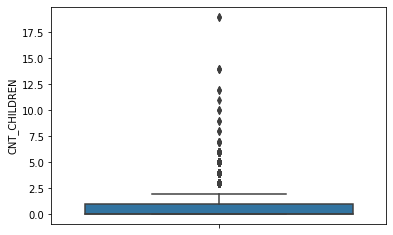

In [23]:
#We will boxplot nuerical type columns and observe for outliers

#Outlier Handling for CNT_CHILDREN
sns.boxplot(y = Revised_Application_Data.CNT_CHILDREN, data = Revised_Application_Data)

In [24]:
Revised_Application_Data.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [25]:
Revised_Application_Data.CNT_CHILDREN.quantile([0.75, 0.90, 0.99])

0.75    1.0
0.90    2.0
0.99    3.0
Name: CNT_CHILDREN, dtype: float64

### As observed, 99 percentile of data have 3 children, so it safe to remove rows with CNT_CHILDREN greater than 3.

In [26]:
#Keeping only those rows where CNT_CHILDREN <= 3
Revised_Application_Data = Revised_Application_Data[Revised_Application_Data.CNT_CHILDREN <= 3]

#Verify the CNT_CHILDREN column again after dropping rows
Revised_Application_Data.CNT_CHILDREN.value_counts()

0    215371
1     61119
2     26749
3      3717
Name: CNT_CHILDREN, dtype: int64

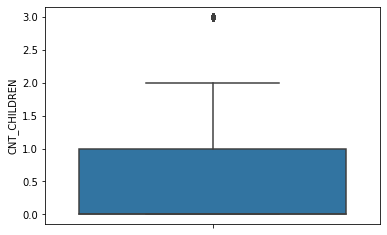

In [69]:
sns.boxplot(y = Revised_Application_Data.CNT_CHILDREN.dropna(), data = Revised_Application_Data)

#### The above data point observed at CNT_CHILDREN = 3 is not considered as an outlier as it is just a high value for CNT_CHILDREN which is normal

#### AMT_CREDIT

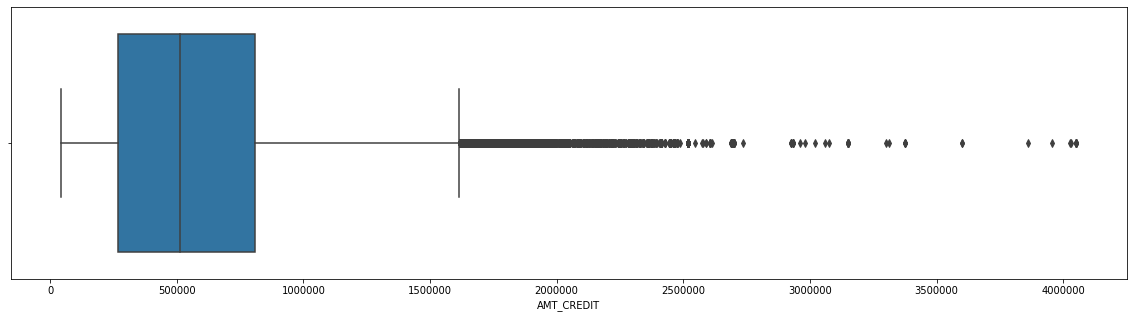

In [68]:
#Outlier Handling for AMT_CREDIT
plt.figure(figsize=[20,5])
sns.boxplot(x = Revised_Application_Data.AMT_CREDIT.dropna(), data = Revised_Application_Data)

#### REGION_POPULATION_RELATIVE 

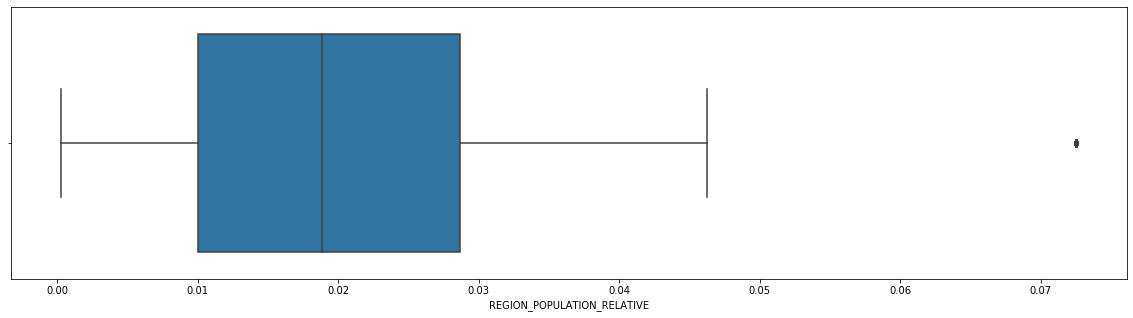

In [67]:
#Outlier Handling for REGION_POPULATION_RELATIVE
plt.figure(figsize=[20,5])
sns.boxplot(x = Revised_Application_Data.REGION_POPULATION_RELATIVE.dropna(), data = Revised_Application_Data)

In [40]:
Revised_Application_Data.REGION_POPULATION_RELATIVE.quantile([0.5, 0.75, 0.90, 0.99])

0.50    0.018850
0.75    0.028663
0.90    0.035792
0.99    0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [41]:
#Find the difference between the max value and 99 percentile
Revised_Application_Data.REGION_POPULATION_RELATIVE.max() - Revised_Application_Data.REGION_POPULATION_RELATIVE.quantile([0.99])


0.99    0.0
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [42]:
#Counting number of values having REGION_POPULATION_RELATIVE = 0.072508
len(Revised_Application_Data.REGION_POPULATION_RELATIVE[Revised_Application_Data.REGION_POPULATION_RELATIVE >= 0.072508])


8397

#### The above data point observed at REGION_POPULATION_RELATIVE = 0.072508 is not considered as an outlier as the difference between max and 99 percentile is zero and the count of data points is reltively high, 8397, so the observed data point is considered a high value

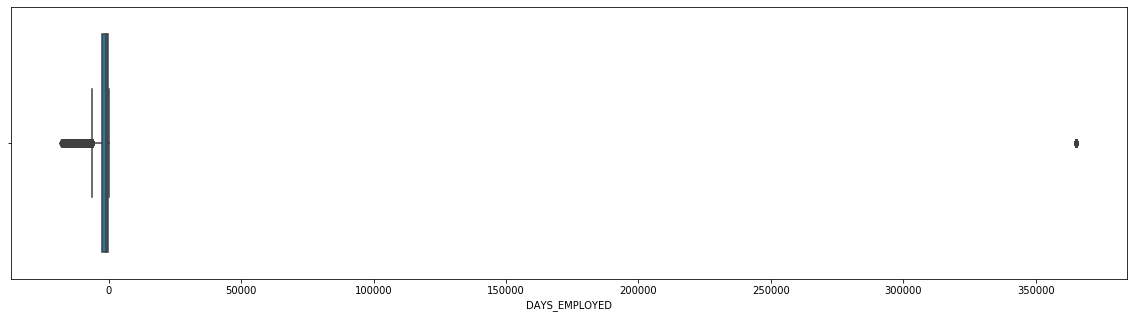

In [70]:
#Outlier Handling for REGION_POPULATION_RELATIVE
plt.figure(figsize=[20,5])
sns.boxplot(x = Revised_Application_Data.DAYS_EMPLOYED.dropna(), data = Revised_Application_Data)

In [60]:
Revised_Application_Data.DAYS_EMPLOYED.value_counts()

 365243    55353
-200         156
-224         152
-199         151
-230         151
           ...  
-5727          1
-11866         1
-9817          1
-13018         1
-16314         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [44]:
Revised_Application_Data.DAYS_EMPLOYED.quantile([0.5, 0.75, 0.90, 0.99])

0.50     -1212.0
0.75      -288.0
0.90    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [45]:
#Find the difference between the max value and 99 percentile
Revised_Application_Data.DAYS_EMPLOYED.max() - Revised_Application_Data.DAYS_EMPLOYED.quantile([0.99])

0.99    0.0
Name: DAYS_EMPLOYED, dtype: float64

In [49]:
#Counting number of values having REGION_POPULATION_RELATIVE = 0.072508
len(Revised_Application_Data.DAYS_EMPLOYED[Revised_Application_Data.DAYS_EMPLOYED >= 365240])

55353

#### The above data point observed at DAYS_EMPLOYED = 365243 is not considered as an outlier as the difference between max and 99 percentile is zero and the count of data points is reltively high, 55353, so the observed data point is considered a high value

# Imbalance Percentage 

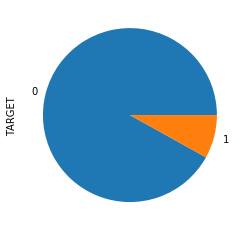

In [80]:
Revised_Application_Data.TARGET.value_counts(normalize=True).plot.pie()

In [65]:
Revised_Application_Data.TARGET.value_counts(normalize=True)

0    0.919357
1    0.080643
Name: TARGET, dtype: float64

    Subsetting the Revised_Application_Data into Target = 1 and Target = 0 dataframe

In [79]:
#Filtering out rows with Target = 1 in Revised_Application_Data 
Revised_App_Data_Target_1 = Revised_Application_Data[(Revised_Application_Data.TARGET == 1)]

#Filtering out rows with Target = 0 in Revised_Application_Data 
Revised_App_Data_Target_0 = Revised_Application_Data[(Revised_Application_Data.TARGET == 0)]

In [88]:
#Verify that the dataframe was correctly sliced
print("With TARGET(1) " + str(len(Revised_App_Data_Target_1)))
print("With TARGET(0) " + str(len(Revised_App_Data_Target_0)))

print("Sum of subsets " + str(len(Revised_App_Data_Target_1) + len(Revised_App_Data_Target_0)))
print()
print("Length of original dataframe " + str(len(Revised_Application_Data)))

With TARGET(1) 24754
With TARGET(0) 282202
Sum of subsets 306956

Length of original dataframe 306956


## Univariate Analysis on Target 1

### Unordered Categorical

#### NAME_CONTRACT_TYPE

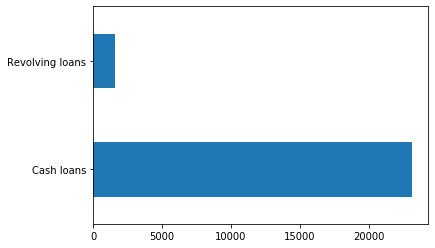

In [89]:
#NAME_CONTRACT_TYPE is an unorder categorical column
#Plotting bar graph for TARGET = 1
Revised_App_Data_Target_1.NAME_CONTRACT_TYPE.value_counts().plot.barh()
plt.show()

    From the above plot we can infer that for TARGET = 1, i.e., for clients having payment difficulties, there is a huge difference between clients opting for revolving loan and cash loans.
    As per the defination, Cash debt is a loan with a set payment schedule over several months or years. After you set up your revolving loan, the lender tells you the maximum you can borrow. You can borrow money whenever you need it, pay it back on your schedule, then borrow again.
    Relatively a large number of clients (almost 14 times) have opted for Cash loans as opposed to Revolving loans. This is due to the fact, that in  cash loans you can opt for relatively large amount of money. For revolving payment, since the limit is set by lender, and would be very low as compared to limit in cash loan, hence, clients prefer cash loan. Moreover, since cash loan is one time activity and revolving loan is a recurring activity, client tend to incline towards cash loan.

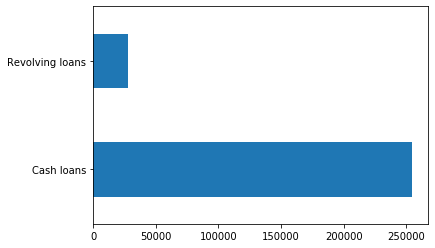

In [93]:
#Plotting bar graph for TARGET = 0
Revised_App_Data_Target_0.NAME_CONTRACT_TYPE.value_counts().plot.barh()
plt.show()

    We observe a similar situation in TARGET = 0, where clients had no payment difficulties.
    Relatively a large number of clients (almost 9 times) have opted for Cash loans as opposed to Revolving loans. This is again due to the fact, that cash loans is one time payment and you can opt for relatively large amount of money. For revolving payment, since the limit is set by lender, and would be very low as compared to limit in cash loan, hence, clients prefer cash loan. Moreover, since cash loan is one time activity and revolving loan is a recurring activity, client tend to incline towards cash loan.

#### CODE_GENDER 

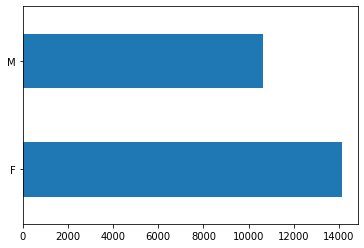

In [99]:
#CODE_GENDER is an unordered categorical column
#Plotting bar graph for TARGET = 1
Revised_App_Data_Target_1.CODE_GENDER.value_counts().plot.barh()
plt.show()

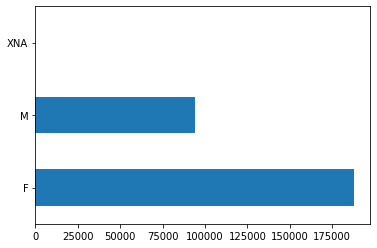

In [100]:
#Plotting bar graph for TARGET = 0
Revised_App_Data_Target_0.CODE_GENDER.value_counts().plot.barh()
plt.show()

#### NAME_INCOME_TYPE

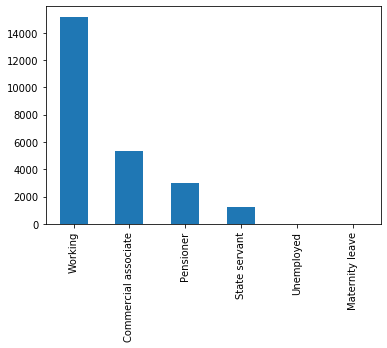

In [103]:
#CODE_GENDER is an unordered categorical column
#Plotting bar graph for TARGET = 1
Revised_App_Data_Target_1.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.show()

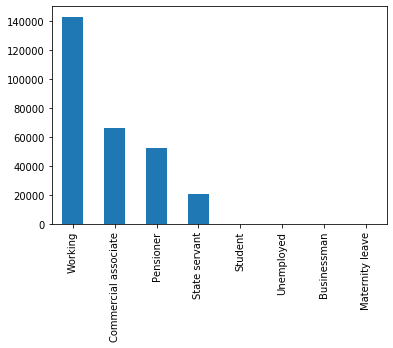

In [105]:
#Plotting bar graph for TARGET = 0
Revised_App_Data_Target_0.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.show()

### Ordered Categorical

#### CNT_CHILDREN

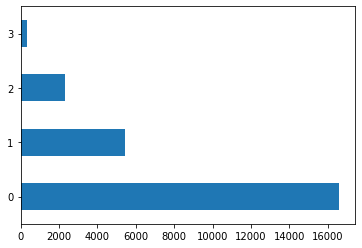

In [94]:
#NAME_CONTRACT_TYPE is an ordered categorical column
#Plotting bar graph for TARGET = 1
Revised_App_Data_Target_1.CNT_CHILDREN.value_counts().plot.barh()
plt.show()

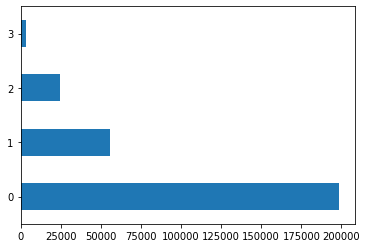

In [98]:
#Plotting bar graph for TARGET = 0
Revised_App_Data_Target_0.CNT_CHILDREN.value_counts().plot.barh()
plt.show()

#### NAME_EDUCATION_TYPE

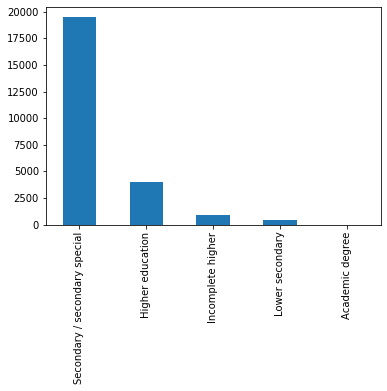

In [107]:
#NAME_EDUCATION_TYPE is an ordered categorical column
#Plotting bar graph for TARGET = 1
Revised_App_Data_Target_1.NAME_EDUCATION_TYPE.value_counts().plot.bar()
plt.show()

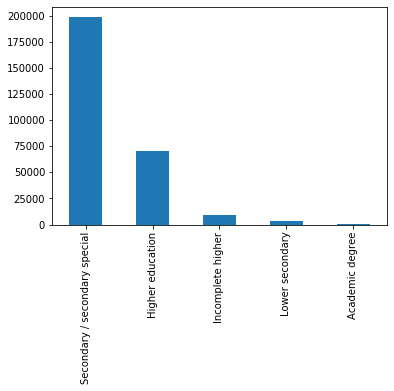

In [109]:
#Plotting bar graph for TARGET = 0
Revised_App_Data_Target_0.NAME_EDUCATION_TYPE.value_counts().plot.bar()
plt.show()

#### WEEKDAY_APPR_PROCESS_START

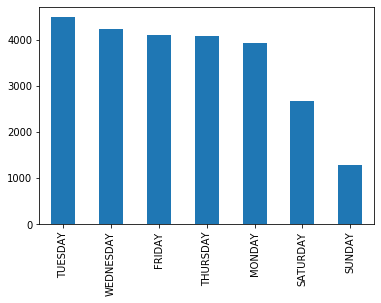

In [110]:
#WEEKDAY_APPR_PROCESS_START is an ordered categorical column
#Plotting bar graph for TARGET = 1
Revised_App_Data_Target_1.WEEKDAY_APPR_PROCESS_START.value_counts().plot.bar()
plt.show()

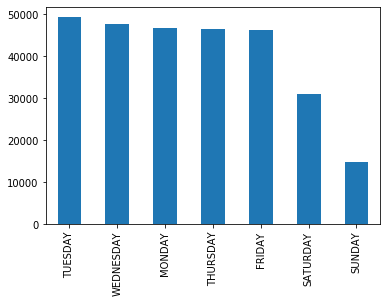

In [111]:
#Plotting bar graph for TARGET = 0
Revised_App_Data_Target_0.WEEKDAY_APPR_PROCESS_START.value_counts().plot.bar()
plt.show()